## Student: Tornike Onoprishvili   
## Exercise 4. `PyTorch Fundamentals`

All tasks are in this single notebook.

In [1]:
from math import ceil as roof # Very important!
import numpy as np
import torch

assert torch.cuda.is_available()

## Task 1:

Tensors are a generalisation of multidimensional arrays and the data structure in PyTorch. Experiment with PyTorch tensors as follows:

-    Create a 2D tensor of size 5x3 where the elements are pulled from the normal probability distribution with zero mean and unit variance.
-    Present the memory contents and the metadata (size, offset, stride) of the tensor.
-    Transpose the tensor without copying in memory.
-    Present the memory contents and the metadata (size, offset, stride) of the tensor.
-    Test whether the tensor and its transpose are contiguous in memory.

Hints: randn, size, offset, stride, transpose, is_contiguous.

In [2]:
ten = torch.randn(5,3)

print("Size", ten.size())
print("Offset", ten.storage_offset())
print("Offset", ten.stride())

ten_t = ten.transpose(0,1)

print(ten, '\n', ten_t)
print("Size", ten_t.size())
print("Offset", ten_t.storage_offset())
print("Offset", ten_t.stride())

print("Is tensor contiguous", ten.is_contiguous(),)
print("Is tensor.T contiguous", ten_t.is_contiguous(),)

Size torch.Size([5, 3])
Offset 0
Offset (3, 1)
tensor([[-0.7213, -2.5303,  0.7433],
        [ 1.1376, -0.2916, -0.9032],
        [-0.2675,  0.7849,  0.5421],
        [ 0.9652,  0.6450,  0.5692],
        [ 0.7648, -0.2300, -1.1352]]) 
 tensor([[-0.7213,  1.1376, -0.2675,  0.9652,  0.7648],
        [-2.5303, -0.2916,  0.7849,  0.6450, -0.2300],
        [ 0.7433, -0.9032,  0.5421,  0.5692, -1.1352]])
Size torch.Size([3, 5])
Offset 0
Offset (1, 3)
Is tensor contiguous True
Is tensor.T contiguous False


## Task 2

PyTorch tensors can be created by constructors, but also by converting them from other types of multidimensional arrays.

Experiment with PyTorch tensors as follows:

-    Create a tensor by loading the given data.
-    Normalise the data by standardisation (zero mean, unit variance).
-    Serialise (save) the tensor to a file, also in the HDF5 format.

Hints: NumPy, h5py.

In [3]:
import h5py
import numpy as np
import pandas as pd

arr = torch.tensor(pd.read_csv('t003a.csv', header=None).to_numpy())
# arr =  / (arr.std(1))
arr -= arr.mean(0)
arr /= arr.std(0)

print("Normed, mean", arr.mean(0).tolist())
print("Normed std", arr.std(0).tolist())

torch.save(arr, 'tensor.pt')

! rm -f tensor.h5

with h5py.File('tensor.h5', 'w') as h5f:
     h5f.create_dataset('arr', data = arr)


f = h5py.File('tensor.h5', 'r')
f['arr'].shape

Normed, mean [-3.552713678800501e-17, -4.440892098500626e-18]
Normed std [1.0000000000000004, 0.9999999999999998]


(100, 2)

## Task 3
In linear regression, a linear model is fitted to data. One of the simplest forms of the model is

$$y=wx+b$$

where x is the input variable, y is the predicted variable, and the model parameters are the weight x and bias b.

Implement an iterative learning algorithm for linear regression with PyTorch. Automatic differentiation (autograd) may be used, and the loss function and training process parameters can be selected freely. Estimate the model parameters using the given data.

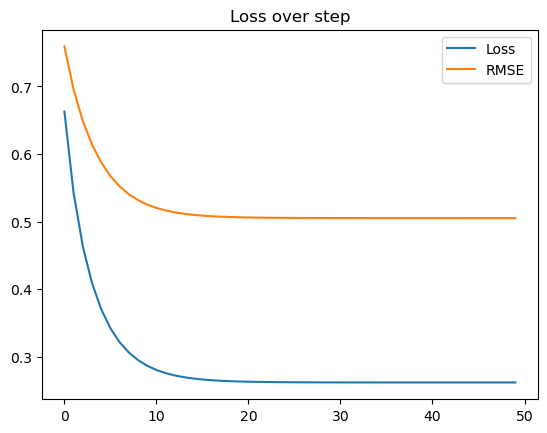

In [22]:
data = torch.tensor(pd.read_csv('t002c.csv', header=None).to_numpy())

def loss(input, target):
    return ((input - target) ** 2).sum()

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

def model(x):
    return x * w + b

loss_hist = []
rmse_hist = []
epochs = 50
for i in range(epochs):
    mean_l = 0
    for x, y in data:
        y_pred = model(x)
        l = loss(y_pred, y)
        l.backward()
        mean_l += l.item() / len(data)
        with torch.no_grad():
            w -= .01 * w.grad
            b -= .01 * b.grad
            w.grad = None
            b.grad = None
    with torch.no_grad():
        rmse = []
        for x, y in data:
            err = (y - model(x)) ** 2
            rmse.append(err)
        rmse = torch.tensor(rmse).mean().sqrt()
    rmse_hist.append(rmse)
    loss_hist.append(mean_l)
    
import matplotlib.pyplot as plt
plt.plot(loss_hist, label='Loss')
plt.plot(rmse_hist, label='RMSE')
plt.title("Loss over step")
plt.legend()